In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
data=pd.read_csv('/content/drive/MyDrive/ML_Dataset/train_loan_prediction.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.dropna(axis=0,inplace=True)

In [7]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

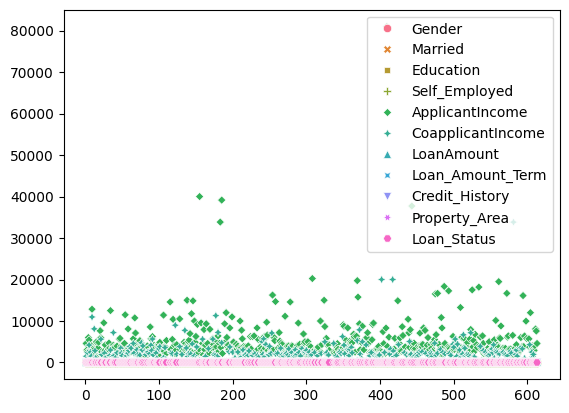

In [42]:
sns.scatterplot(data)

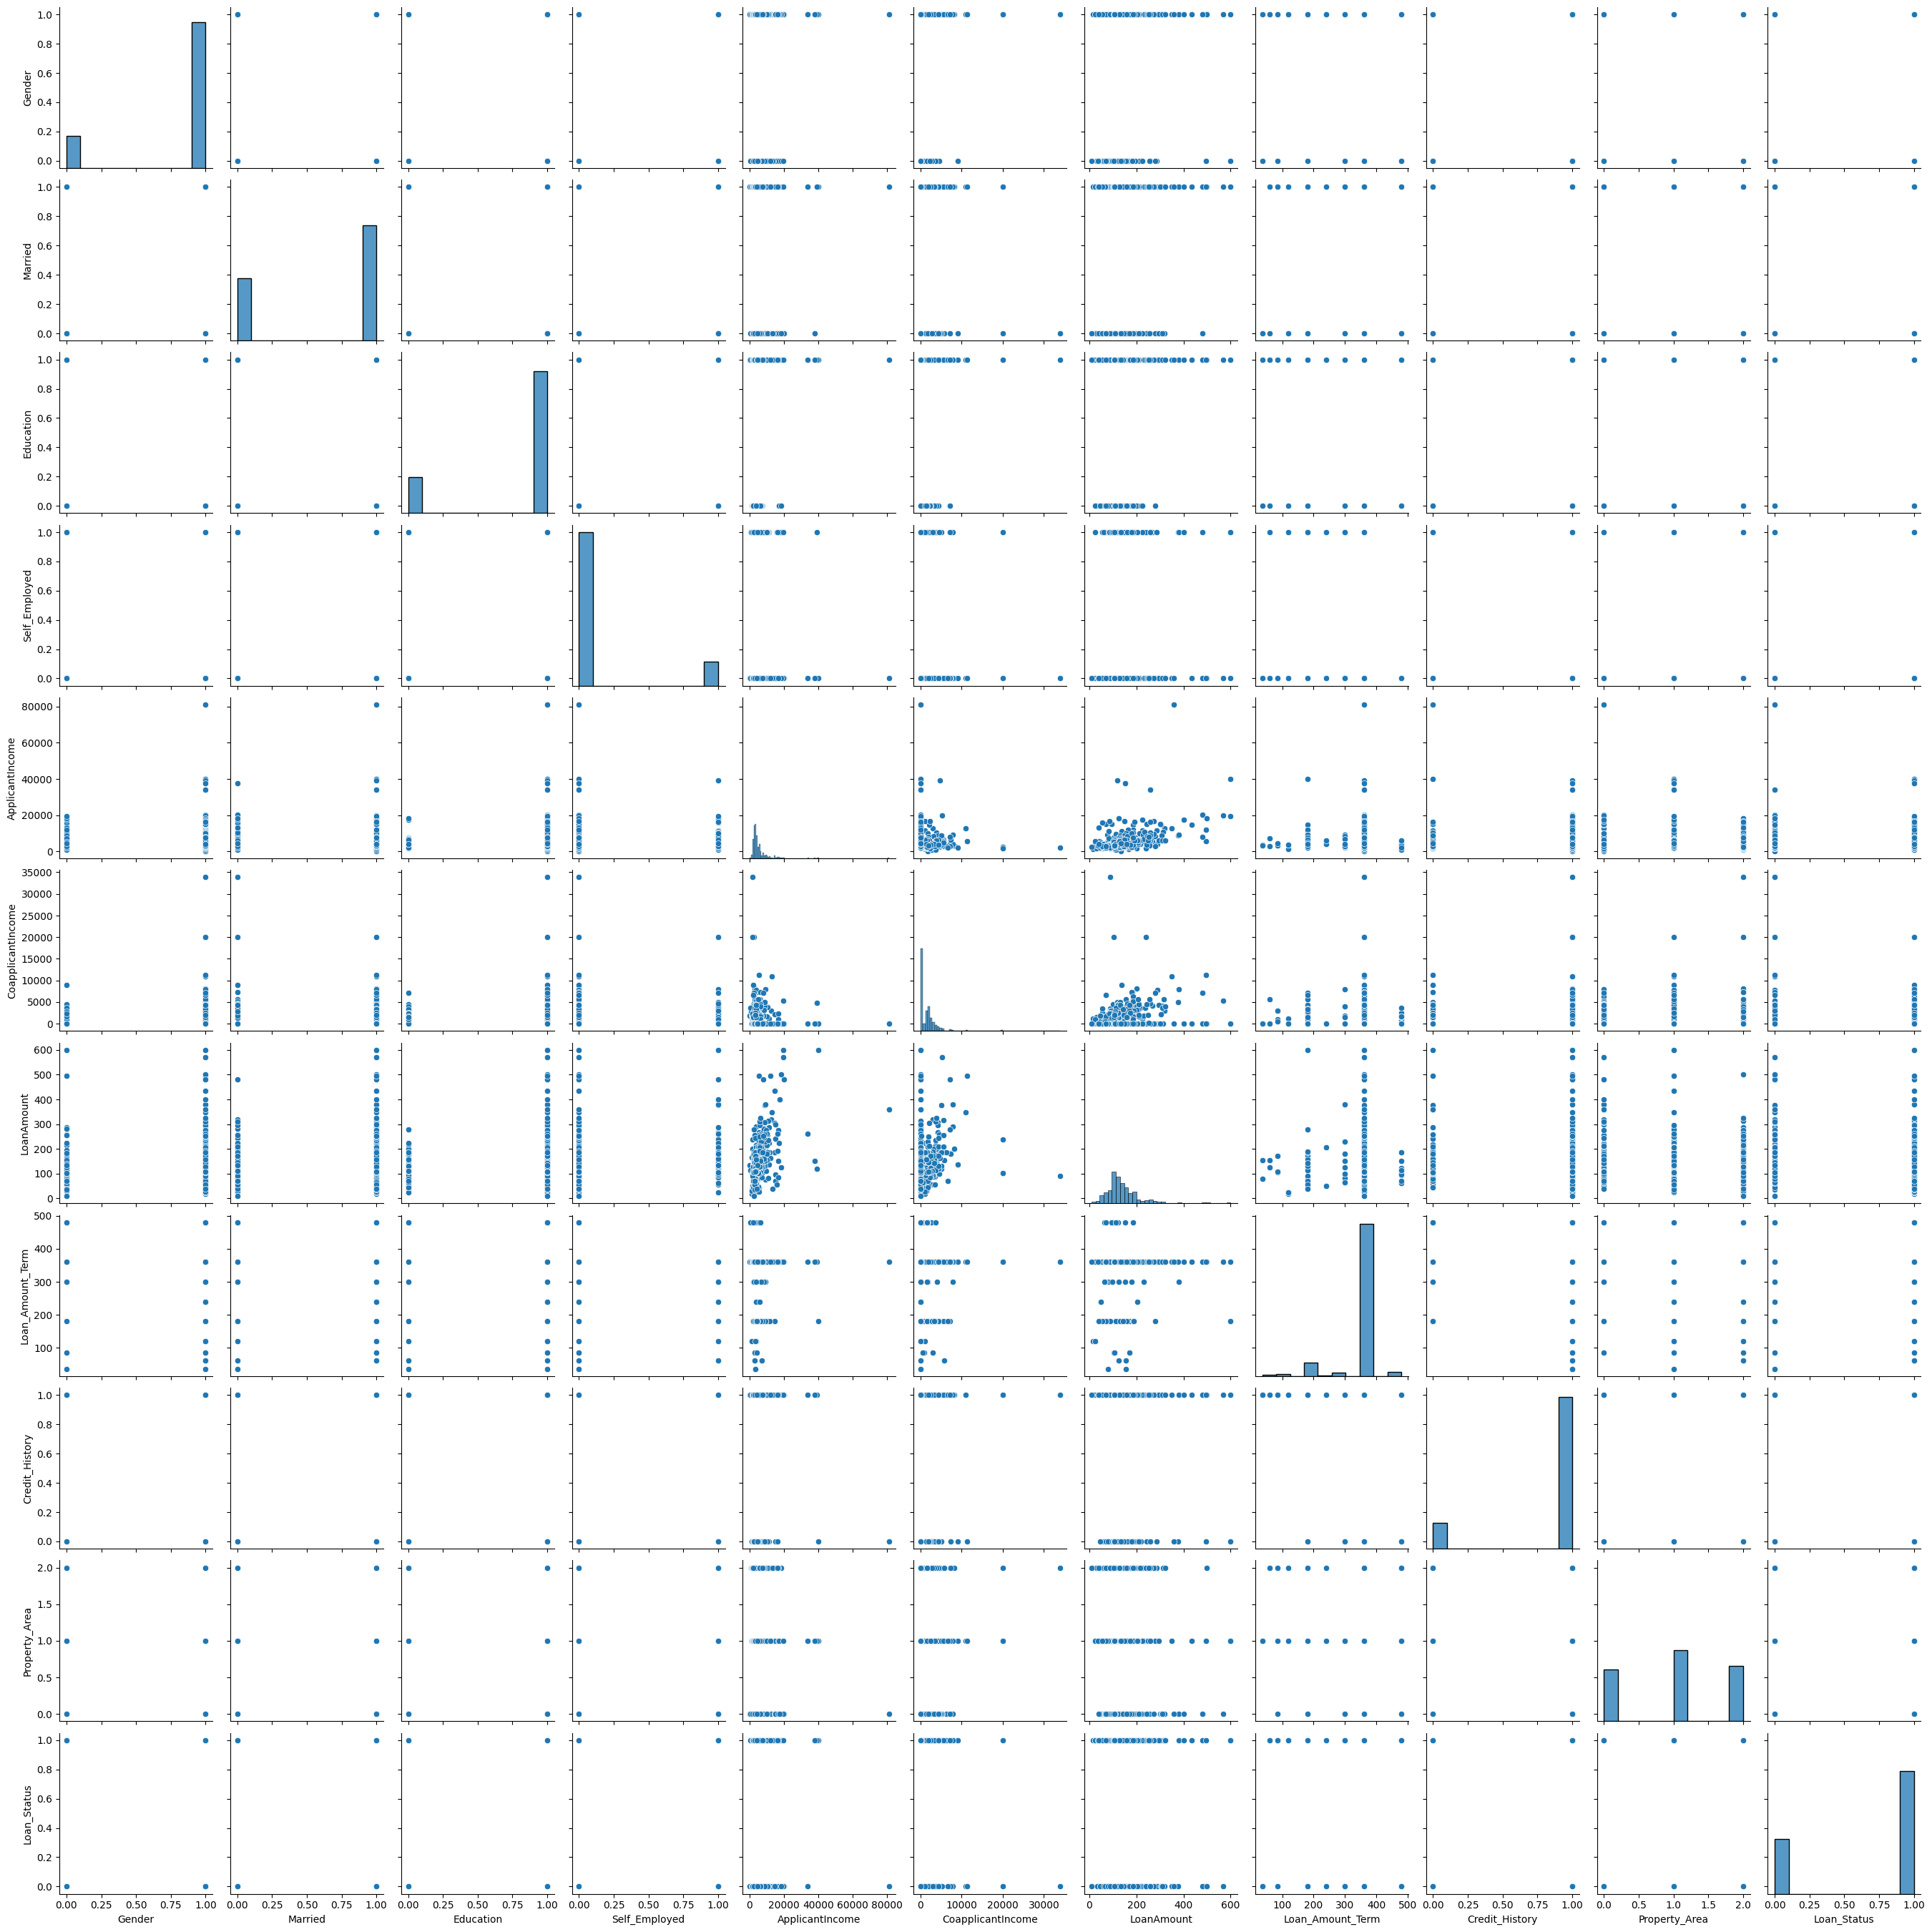

In [44]:
sns.pairplot(data)

In [8]:
data.shape

(480, 13)

<Axes: xlabel='Gender', ylabel='count'>

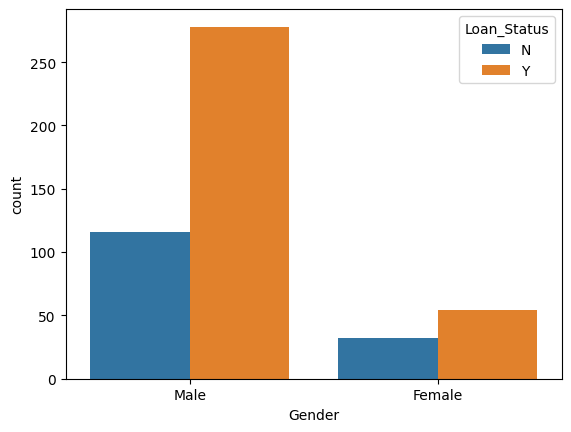

In [9]:
sns.countplot(data=data,x='Gender',hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

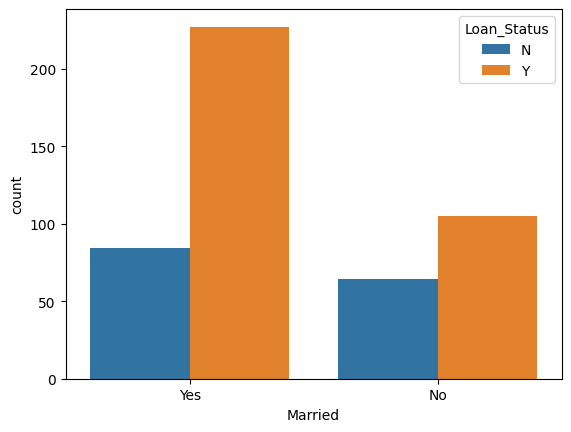

In [10]:
sns.countplot(data=data,x='Married',hue='Loan_Status')

<Axes: xlabel='LoanAmount', ylabel='Count'>

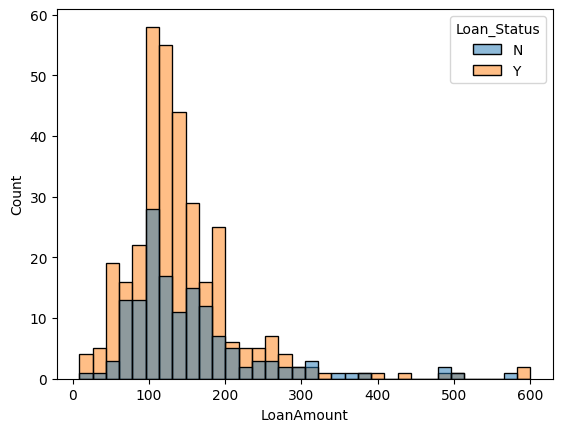

In [11]:
sns.histplot(data=data,x='LoanAmount',hue='Loan_Status')

<Axes: xlabel='Education', ylabel='count'>

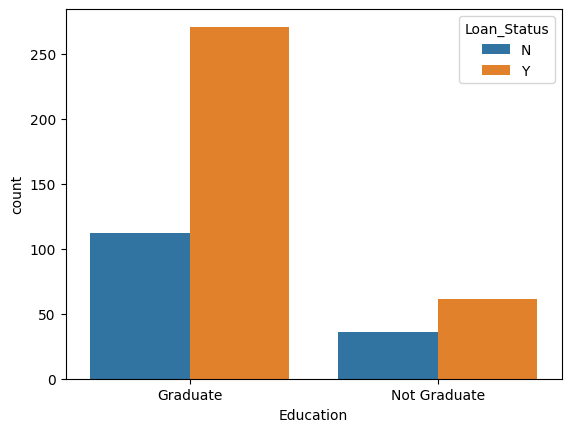

In [12]:
sns.countplot(data=data,x='Education',hue='Loan_Status')

In [13]:
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [14]:
data['Dependents'].replace({'3+':4},inplace=True)

In [15]:
data['Dependents'].unique()

array(['1', '0', '2', 4], dtype=object)

In [16]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [17]:
data['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)

In [18]:
data['Married'].replace({'No':0,'Yes':1},inplace=True)

In [19]:
data['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [20]:
data['Property_Area'].replace({'Rural':0, 'Urban':2, 'Semiurban':1},inplace=True)

In [21]:
data['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [22]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,No,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,1,Yes,5417,4196.0,267.0,360.0,1.0,2,Y


In [23]:
data.replace({'Self_Employed':{'No':0,'Yes':1},'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [24]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [25]:
data=data.drop(['Loan_ID'],axis=1)

In [26]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [27]:
data['Loan_Amount_Term'].max()

480.0

In [34]:
data['LoanAmount'].max()

600.0

In [35]:
#saperate dep and indi veriable
X=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

In [36]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X)

# scaler.transform(X[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [31]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.10, random_state=2)

In [53]:
from sklearn.svm import SVC

In [54]:
classifier=SVC(kernel='linear')

In [55]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [56]:
y_pred=classifier.predict(X_test)

In [57]:
score=accuracy_score(y_pred,y_test)

In [58]:
score

0.8125

In [59]:
y_pred_train=classifier.predict(X_train)

In [60]:
score1=accuracy_score(y_pred_train,y_train)

In [61]:
score1

0.7962962962962963